In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [11]:
numerical = df.select_dtypes(include=[np.number])
categorical = df.select_dtypes(include=[object])


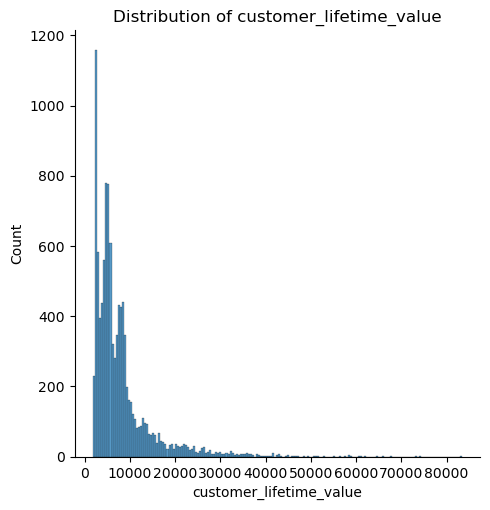

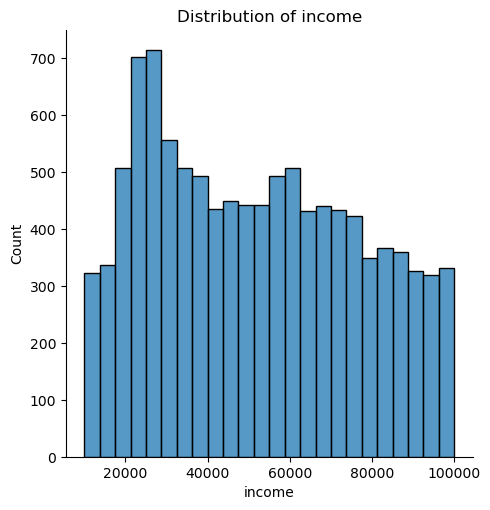

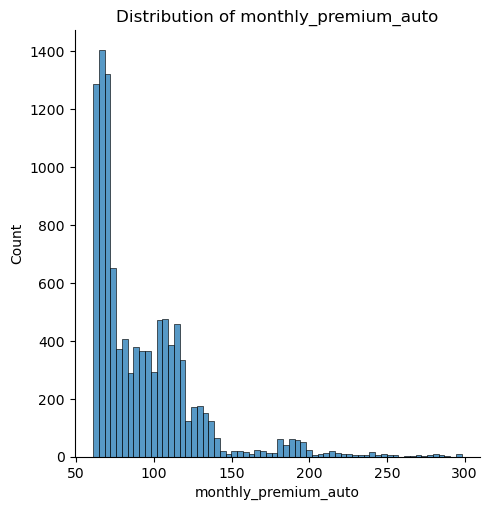

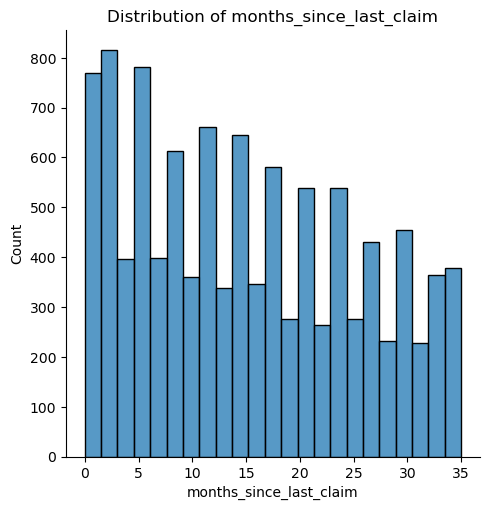

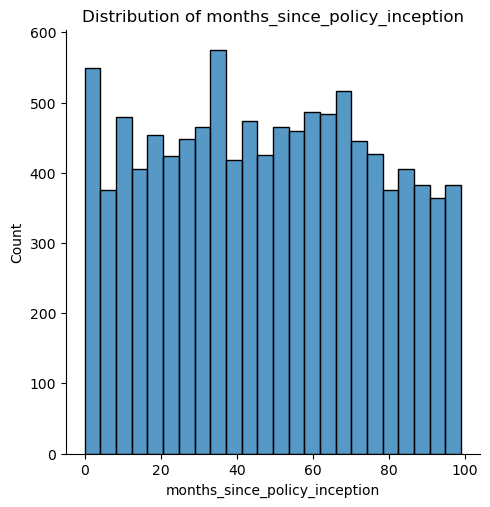

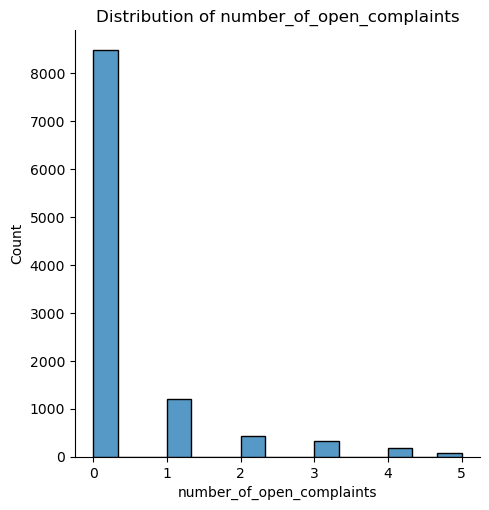

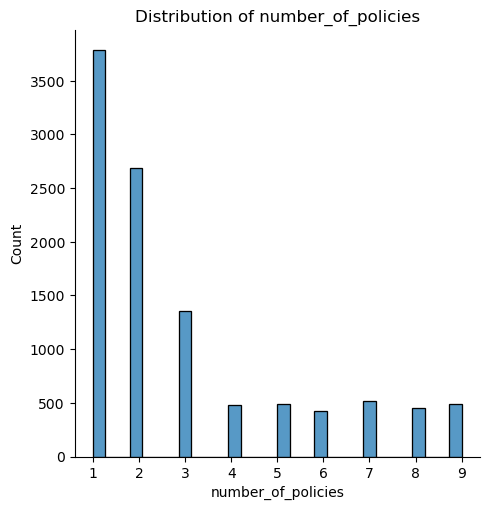

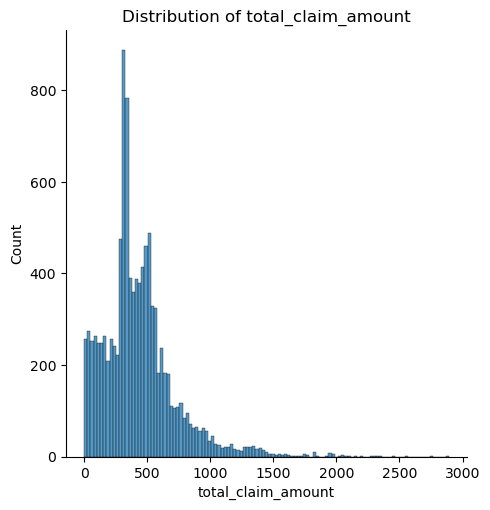

In [12]:
# Seaborn distribution plots
for column in numerical.columns:
    sns.displot(numerical[column])
    plt.title(f"Distribution of {column}")
    plt.show()




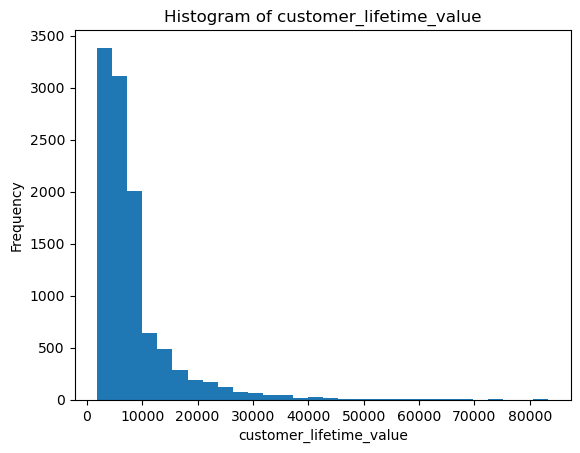

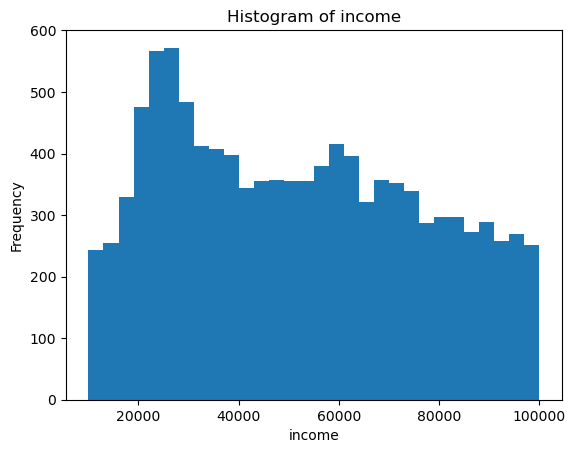

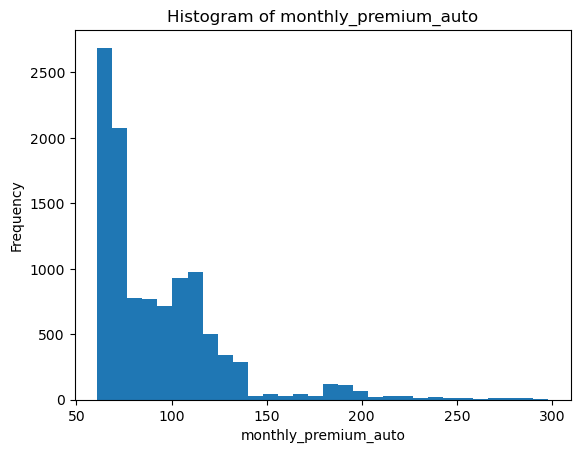

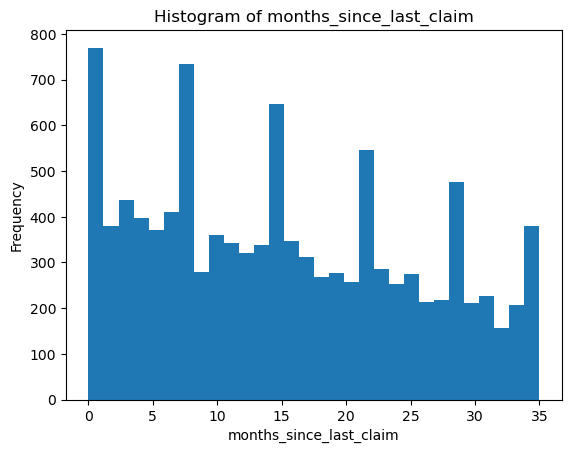

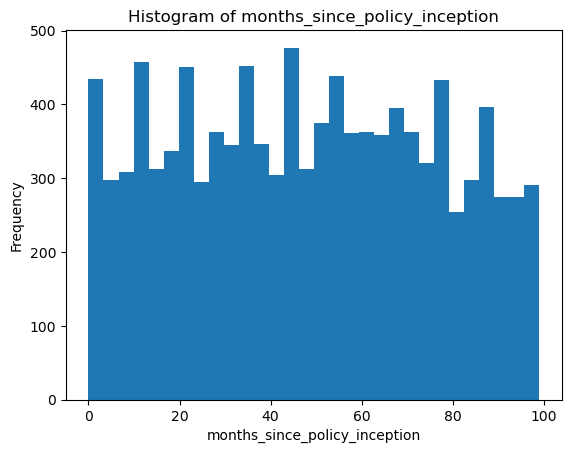

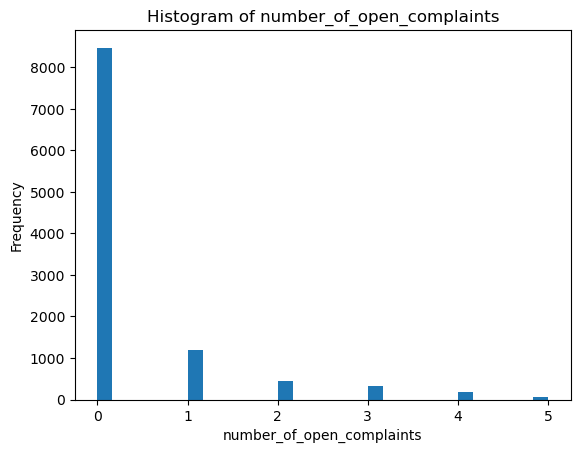

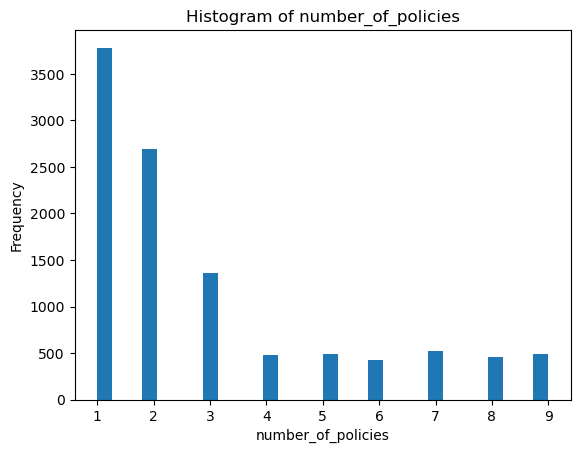

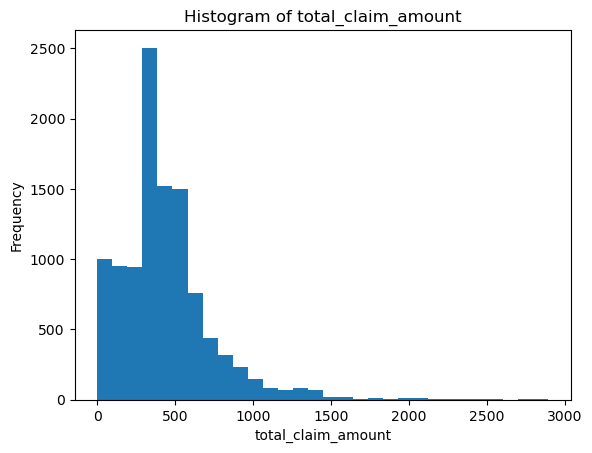

In [13]:
# Matplotlib histograms
for column in numerical.columns:
    plt.hist(numerical[column], bins=30)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
    

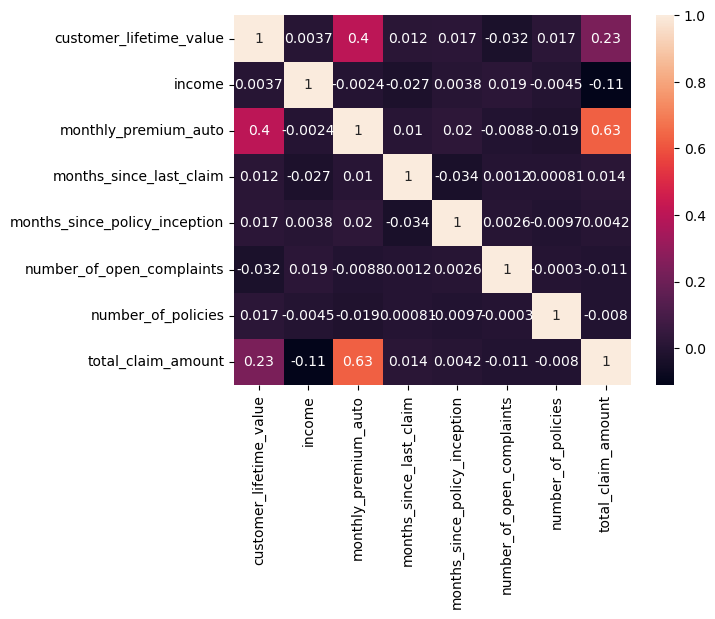

In [14]:
correlation_matrix = numerical.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()



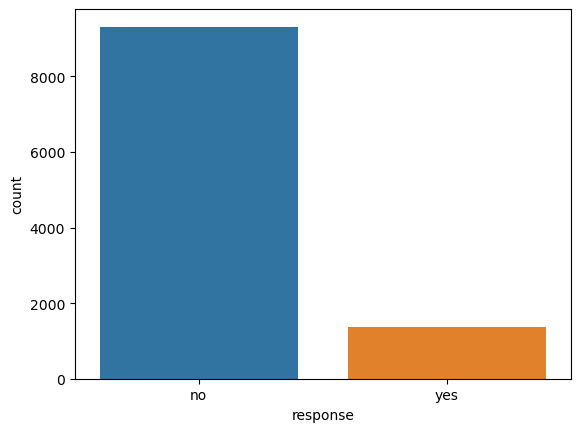

In [16]:
# Total number of responses
df['response'] = df['response'].astype('object')

sns.countplot(x='response', data=df)
plt.show()



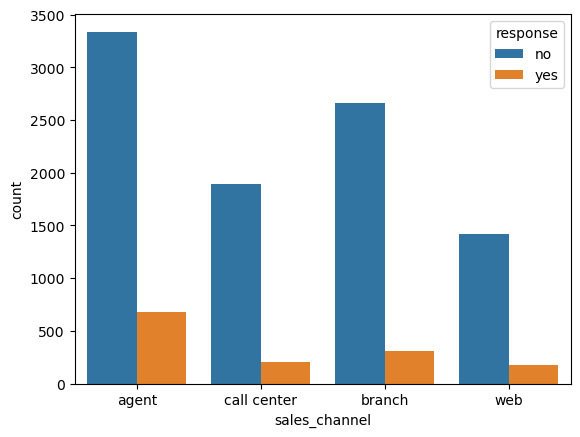

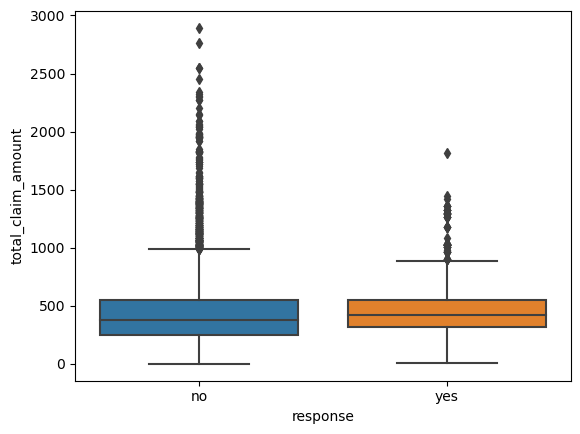

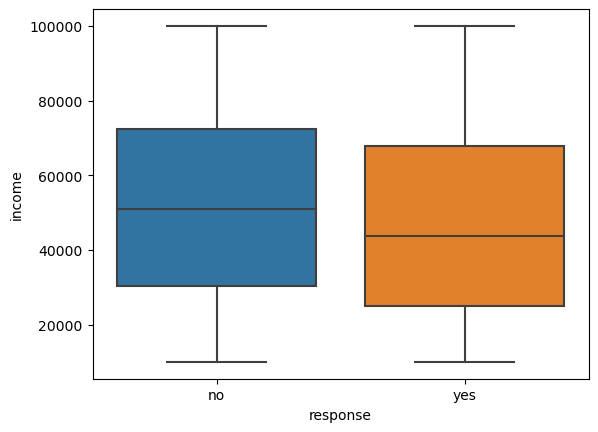

In [18]:
# Response by sales channel
sns.countplot(x='sales_channel', hue='response', data=df)
plt.show()


# Response by total claim amount
sns.boxplot(x=df['response'], y=df['total_claim_amount'])
plt.show()

# Response by income
sns.boxplot(x=df['response'], y=df['income'])
plt.show()

# Getting a boolean mask of absolute correlations greater than 0.9 (excluding diagonal)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
high_corr = correlation_matrix.mask(mask).abs() > 0.9

# Drop columns
cols_to_drop = [col for col in high_corr.columns if any(high_corr[col])]
numerical = numerical.drop(columns=cols_to_drop)

categorical_encoded = pd.get_dummies(categorical, drop_first=True)
